# Bibliotecas

In [1]:
import pandas as pd
import numpy
import seaborn as sns
from numpy import int64
import folium
import plotly.express as px

# Importando Dataset e obtendo algumas vizualizações

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Limpeza dos Dados

In [5]:
# ---------- Conversão de tipo de variáveis -----------#
data['date'] = pd.to_datetime(data['date'])
data['bathrooms'] = data['bathrooms'].astype(int64)
data['floors'] = data['floors'].astype(int64)

In [6]:
print(data.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [7]:
# ---------------- Exclusão de valores duplicados ------------- #
data.loc[data['id'].duplicated(keep=False)].sort_values(['id','date']).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2496,1000102,2014-09-16,280000.0,6,3,2400,9373,2,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2497,1000102,2015-04-22,300000.0,6,3,2400,9373,2,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
16814,7200179,2014-10-16,150000.0,2,1,840,12750,1,0,0,...,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
16815,7200179,2015-04-24,175000.0,2,1,840,12750,1,0,0,...,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
11433,109200390,2014-08-20,245000.0,3,1,1480,3900,1,0,0,...,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956


In [8]:
data = data.drop_duplicates(subset=['id'], keep='last')
data.loc[data['id'].duplicated(keep=False)].sort_values(['id','date']).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [9]:
# ------------------ Remoção de Outliers -------------- #
data.loc[data['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1,1620,6000,1,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [10]:
# Analisando o tamanho da casa, considero que este valor de 33 quartos seja um outlier, sendo assim, 
# ele será excluido do Dataset.
data = data.drop(15870)

In [11]:
# --------------- Conversão de SQFT para m² --------------- #
data['m²_living'] = data['sqft_living']*0.0929
data['m²_lot'] = data['sqft_lot']*0.0929

data[['sqft_living','m²_living','sqft_lot','m²_lot']]

,sqft_living,m²_living,sqft_lot,m²_lot
0,1180,109.622,5650,524.8850
1,2570,238.753,7242,672.7818
2,770,71.533,10000,929.0000
3,1960,182.084,5000,464.5000
4,1680,156.072,8080,750.6320
...,...,...,...,...
21608,1530,142.137,1131,105.0699
21609,2310,214.599,5813,540.0277
21610,1020,94.758,1350,125.4150
21611,1600,148.640,2388,221.8452


# Criação de features

In [12]:
# -------- Feature para descrever a condição da casa -------- #
data['condition_type'] = data['condition'].apply(lambda x: 'Ruim' if x <= 2
                                                 else 'Regular' if (x == 3)|(x == 4)
                                                 else 'Boa')

# -------- Feature para descrever o tipo de vista -------- #
data['view_type'] = data['view'].apply(lambda x: 'Ruim' if x <= 2
                                       else 'Boa')

# -------- Feature para ordenar o ano de construção -------- #
data['built'] = data['yr_built'].apply(lambda x: 'Anterior à 1970' if x < 1970
                                       else 'Depois de 1970')

# -------- Feature para identificar imóveis com e sem porão -------- #
data['basement'] = data['sqft_basement'].apply(lambda x: 'Com Porão' if x > 0
                                               else 'Sem Porão')

# -------- Feature para identificar imóveis reformados e não reformados -------- #
data['renovated'] = data['yr_renovated'].apply(lambda x: 'Reformado' if x > 0
                                               else 'Não reformado')

# -------- Feature para identificar imóveis com mais ou menos de 100 m² -------- #
data['footage'] = data['m²_lot'].apply(lambda x: 'Menor que 100m²' if x < 100
                                               else 'Maior que 100m²')

# -------- Feature para identificar se o imóvel tem mais ou menos de 3 quartos -------- #
data['number_bedrooms'] = data['bedrooms'].apply(lambda x: 'Com 2 ou menos quartos' if x <= 2 
                                             else 'Mais de 3 quartos')

# -------- Feature para identificar o nível do imóvel de acordo com o valor -------- #
data['level'] = data['price'].apply(lambda x: 'Padrão Baixo' if x < 400000 
                                    else      'Padrão Medio' if 40000 <= x <= 650000 
                                    else      'Padrão Alto')

# -------- Feature para segmentar por mês e ano -------- #
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# -------- Feature para segmentar por estações do ano (sazonalidade) -------- #
data['season'] = data['month'].apply(lambda x: 'Spring' if 3 <= x <= 5 else
                                               'Summer' if 6 <= x <= 8 else
                                               'Autumn' if 9 <= x <= 11 else
                                               'Winter')

In [13]:
# ---------- Visualização das features criadas -------- #
data[['condition_type', 'view_type', 'built', 'basement', 'renovated', 
      'footage', 'number_bedrooms', 'month', 'year', 'season', 'price','level']]

,condition_type,view_type,built,basement,renovated,footage,number_bedrooms,month,year,season,price,level
0,Regular,Ruim,Anterior à 1970,Sem Porão,Não reformado,Maior que 100m²,Mais de 3 quartos,10,2014,Autumn,221900.0,Padrão Baixo
1,Regular,Ruim,Anterior à 1970,Com Porão,Reformado,Maior que 100m²,Mais de 3 quartos,12,2014,Winter,538000.0,Padrão Medio
2,Regular,Ruim,Anterior à 1970,Sem Porão,Não reformado,Maior que 100m²,Com 2 ou menos quartos,2,2015,Winter,180000.0,Padrão Baixo
3,Boa,Ruim,Anterior à 1970,Com Porão,Não reformado,Maior que 100m²,Mais de 3 quartos,12,2014,Winter,604000.0,Padrão Medio
4,Regular,Ruim,Depois de 1970,Sem Porão,Não reformado,Maior que 100m²,Mais de 3 quartos,2,2015,Winter,510000.0,Padrão Medio
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,Regular,Ruim,Depois de 1970,Sem Porão,Não reformado,Maior que 100m²,Mais de 3 quartos,5,2014,Spring,360000.0,Padrão Baixo
21609,Regular,Ruim,Depois de 1970,Sem Porão,Não reformado,Maior que 100m²,Mais de 3 quartos,2,2015,Winter,400000.0,Padrão Medio
21610,Regular,Ruim,Depois de 1970,Sem Porão,Não reformado,Maior que 100m²,Com 2 ou menos quartos,6,2014,Summer,402101.0,Padrão Medio
21611,Regular,Ruim,Depois de 1970,Sem Porão,Não reformado,Maior que 100m²,Mais de 3 quartos,1,2015,Winter,400000.0,Padrão Medio


# Estatísticas

In [14]:
estat = data[['price', 'bedrooms', 'bathrooms', 'floors', 'm²_living', 'm²_lot']]

data.statistic = pd.DataFrame(estat.describe().T)

data.statistic

C:\Users\User\AppData\Local\Temp\ipykernel_540\2372011596.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.statistic = pd.DataFrame(estat.describe().T)


,count,mean,std,min,25%,50%,75%,max
price,21435.0,541645.374434,367322.883495,75000.000,324844.000,450000.0000,645000.00000,7.700000e+06
bedrooms,21435.0,3.370189,0.906920,0.000,3.000,3.0000,4.00000,1.100000e+01
bathrooms,21435.0,1.751714,0.734855,0.000,1.000,2.0000,2.00000,8.000000e+00
floors,21435.0,1.448239,0.552350,1.000,1.000,1.0000,2.00000,3.000000e+00
m²_living,21435.0,193.485294,85.390194,26.941,132.847,178.3680,236.89500,1.257866e+03
m²_lot,21435.0,1406.140351,3859.023518,48.308,468.216,707.3406,993.70485,1.534113e+05


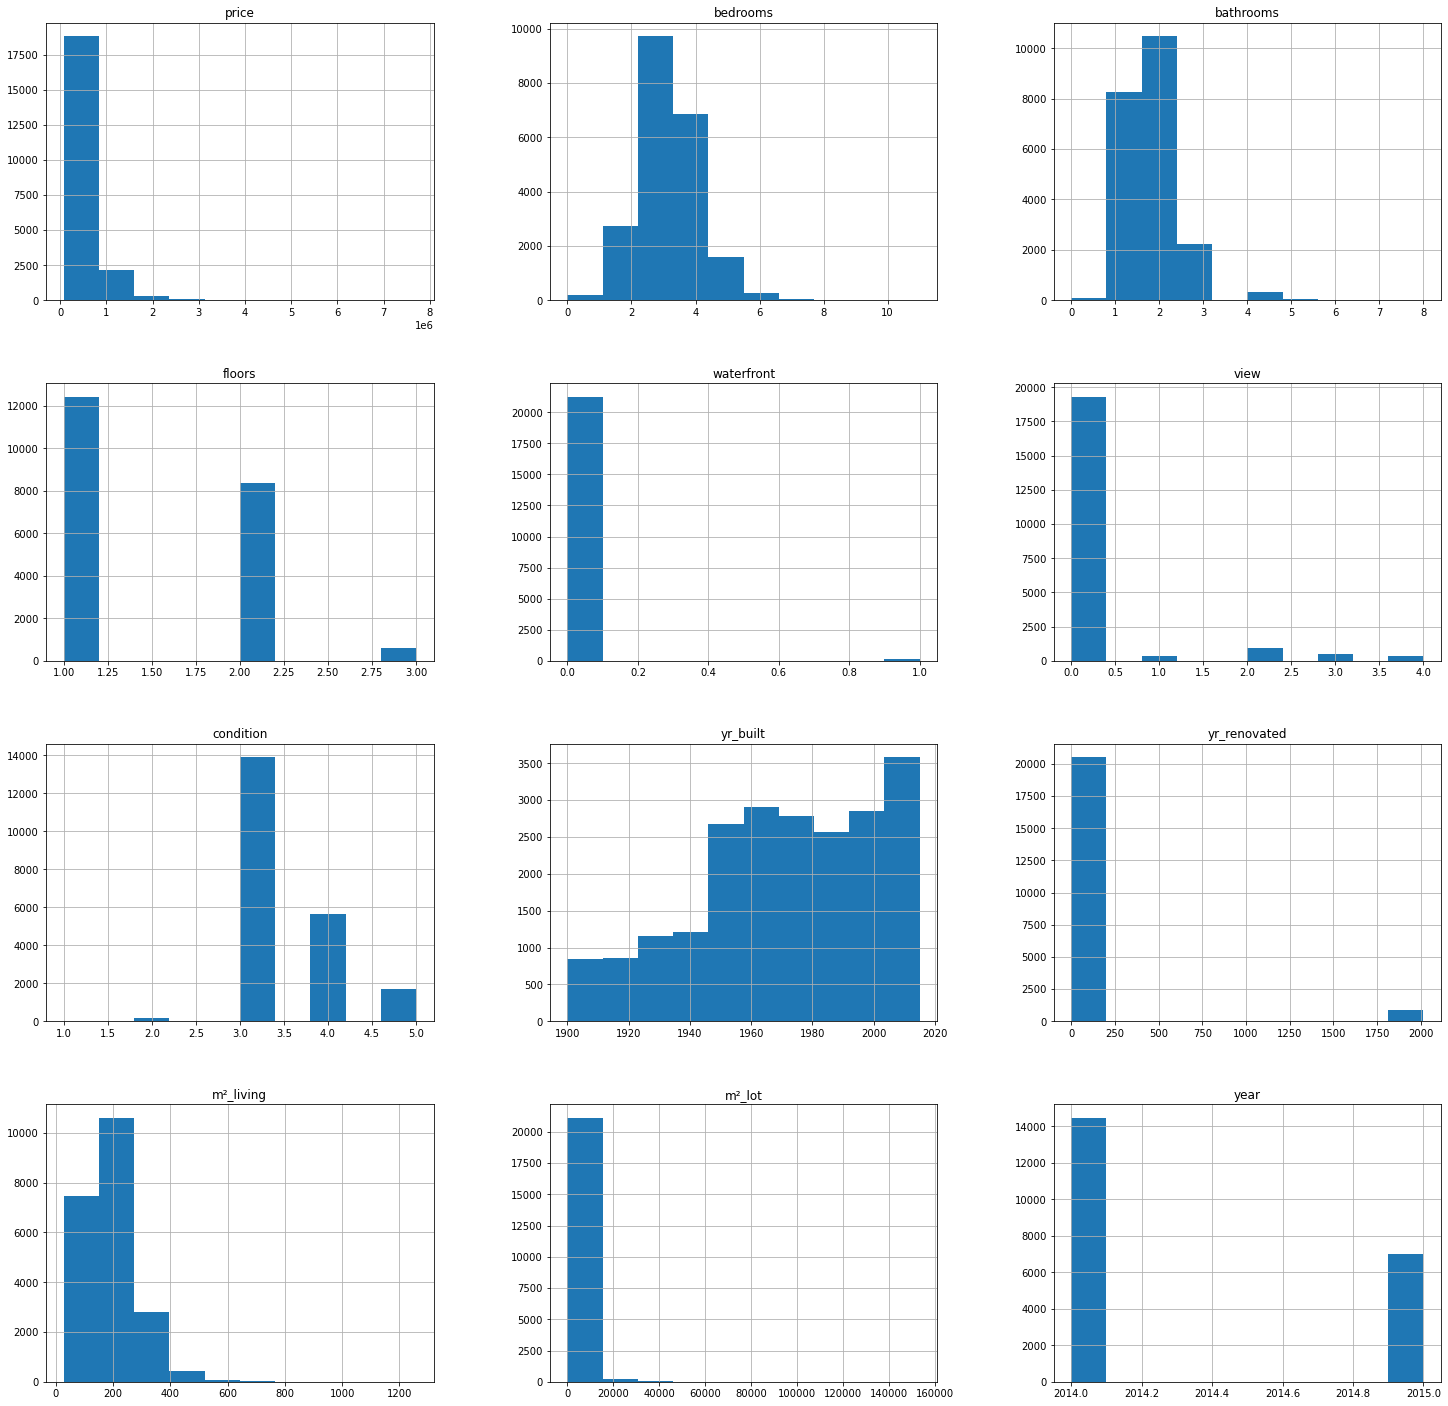

In [15]:
# -------------- Visualização de Histogramas ---------------- #
df = data[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 
           'condition', 'yr_built', 'yr_renovated', 'm²_living', 'm²_lot', 'year',]]
df.hist(figsize=(25,25));

# Hipóteses de negócio para geração de Insights

# H1 - Imóveis com vista para a água são, em média, 30% mais caros.

Falso. Imóveis com vista para a água são, em média 211.76% mais caros.

Imóveis com vista para a água são, em média, 211.76% mais caros.


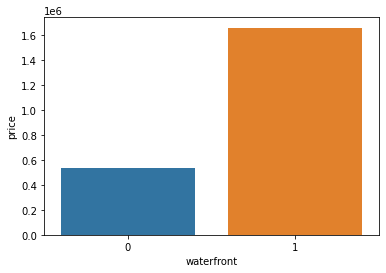

In [17]:
h1 = data[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

sns.barplot(x='waterfront', y='price', data = h1)

h1_percentual = (h1.loc[1,'price'] / h1.loc[0,'price'] -1) * 100
print(f'Imóveis com vista para a água são, em média, {h1_percentual:.2f}% mais caros.')

# H2 - Imóveis com data de construção menor que 1970, são 50% mais baratos, na média.

Falso. Imóveis com data de construção inferior a 1970 são, em média, 11.83% mais baratos.

Imóveis com data de construção inferior a 1970 são, em média, 11.83% mais baratos.


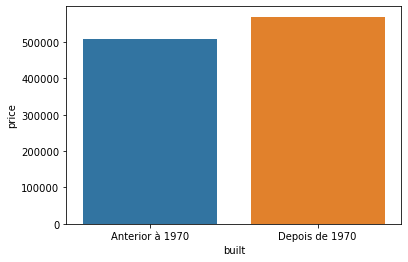

In [18]:
h2 = data[['price', 'built']].groupby('built').mean().reset_index()

sns.barplot(x='built', y='price', data = h2)

h2_percentual = (h2.loc[1,'price'] / h2.loc[0,'price'] -1) * 100
print(f'Imóveis com data de construção inferior a 1970 são, em média, {h2_percentual:.2f}% mais baratos.')

# H3 - Imóveis sem porão possuem área total, em média, 50% maior do que imóveis com porão.

Falso. Imóveis sem porão possuem área total, em média, 22.78% maior do imóveis com porão.

Imóveis sem porão possuem área total, em média, 22.78% maior do imóveis com porão.


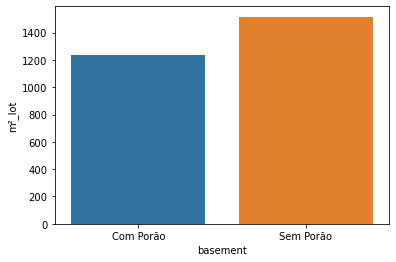

In [19]:
h3 = data[['basement', 'm²_lot']].groupby('basement').mean().reset_index()

sns.barplot(x='basement', y='m²_lot', data = h3)

h3_percentual = (h3.loc[1,'m²_lot'] / h3.loc[0,'m²_lot'] -1) * 100
print(f'Imóveis sem porão possuem área total, em média, {h3_percentual:.2f}% maior do imóveis com porão.')

# H4 - O crescimento do preço dos imóveis YoY (Ano a Ano) é de 10%.

Falso. O crescimento do preço dos imóveis YoY (Ano a Ano) é de 0.05%.

O crescimento do preço dos imóveis YoY (Ano a Ano) é de 0.05%.


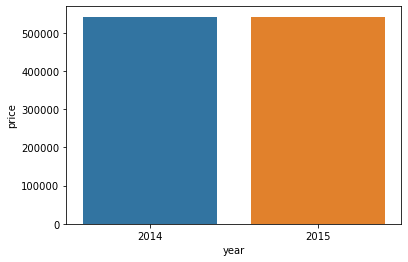

In [73]:
h4 = data[['price', 'year']].groupby('year').mean().reset_index()

sns.barplot(x='year', y='price', data = h4)

h4_percentual = (h4.loc[1,'year'] / h4.loc[0,'year'] -1) * 100
print(f'O crescimento do preço dos imóveis YoY (Ano a Ano) é de {h4_percentual:.2f}%.')

# H5 - O crescimento do preço dos imóveis MoM (Mês a Mês) é de 15%.

Falso. O crescimento do preço dos imóveis MoM (Mês a Mês) é de 23.51%.

O crescimento do preço dos imóveis MoM (Mês a Mês) é de 23.51%.


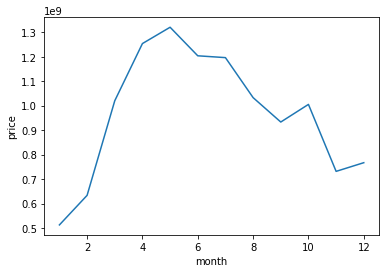

In [74]:
h5 = data[['price', 'month']].groupby('month').sum().reset_index()

sns.lineplot(x='month', y='price', data = h5)

h5_percentual = (h5.loc[1,'price'] / h5.loc[0,'price'] -1) * 100
print(f'O crescimento do preço dos imóveis MoM (Mês a Mês) é de {h5_percentual:.2f}%.')

# H6 - Imóveis com condição BOA e REGULAR vendem mais do que imóveis com condição RUIM.

Verdadeiro. Como podemos observar no gráfico, imóveis com condição BOA vendem 14,06% a mais do que os com condição REGULAR. 
Os imóveis com condição REGULAR vendem, em média, 60.74% a mais do que os com condição RUIM.

Imóveis com condição BOA, vendem 14.06% a mais do que imóveis com condição REGULAR.
Imóveis com condição REGULAR, vendem 60.74% a mais do que imóveis com condição RUIM.


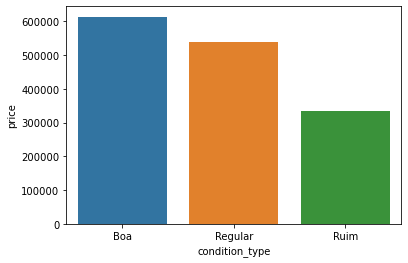

In [75]:
h6 = data[['condition_type', 'price']].groupby('condition_type').mean().reset_index()

sns.barplot(x='condition_type', y='price', data = h6)

h6_percentual1 = (h6.loc[0,'price'] / h6.loc[1,'price'] -1) * 100
print(f'Imóveis com condição BOA, vendem {h6_percentual1:.2f}% a mais do que imóveis com condição REGULAR.')

h6_percentual2 = (h6.loc[1,'price'] / h6.loc[2,'price'] -1) * 100
print(f'Imóveis com condição REGULAR, vendem {h6_percentual2:.2f}% a mais do que imóveis com condição RUIM.')

# H7 - Imóveis com vista para a água são, em média, 25% maiores.

Falso. Imóveis com vista para a água são, em média, 68.50% maior do que imóveis sem vista para a água.

Imóveis com vista para a água são, em média, 68.50% maior do que imóveis sem vista para a água.


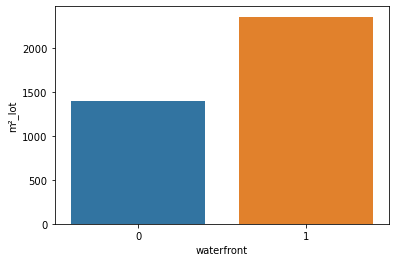

In [76]:
h7 = data[['m²_lot', 'waterfront']].groupby('waterfront').mean().reset_index()

sns.barplot(x='waterfront', y='m²_lot', data = h7)

h7_percentual = (h7.loc[1,'m²_lot'] / h7.loc[0,'m²_lot'] -1) * 100
print(f'Imóveis com vista para a água são, em média, {h7_percentual:.2f}% maior do que imóveis sem vista para a água.')

# H8 - Os imóveis no Outono são 5% mais caros do que no inverno.

Falso. Os imóveis no Outono são, em média, 2.55% mais caros do que no inverno.

Os imóveis no Outono são, em média, 2.55% mais caros do que no inverno.


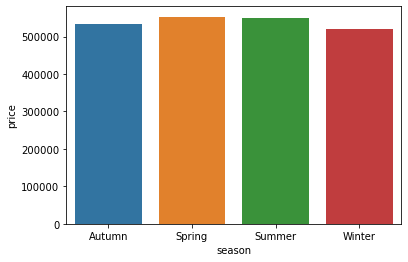

In [77]:
h8 = data[['season', 'price']].groupby('season').mean().reset_index()

sns.barplot(x='season', y='price', data = h8)

h8_percentual = (h8.loc[0,'price'] / h8.loc[3,'price'] -1) * 100
print(f'Os imóveis no Outono são, em média, {h8_percentual:.2f}% mais caros do que no inverno.')

# H9 - Imóveis com mais de 3 quartos vendem mais do que imóveis de 2 quartos.

Verdadeiro. Como podemos observar no gráfico, imóveis de 3 quartos ou mais vendem mais do que imóveis com 2 ou menos quartos.

Os imóveis com mais de 3 quartos, vendem -21.57% a mais do que imóveis com 2 ou menos quartos.


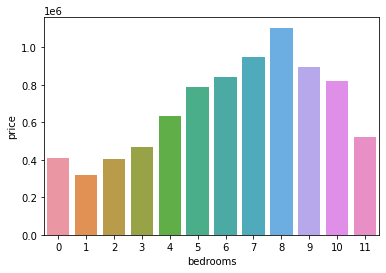

In [78]:
h9 = data[['bedrooms', 'price']].groupby('bedrooms').mean().reset_index()

sns.barplot(x='bedrooms', y='price', data = h9)

h9_percentual = (h9.loc[1,'price'] / h9.loc[0,'price'] -1) * 100
print(f'Os imóveis com mais de 3 quartos, vendem {h9_percentual:.2f}% a mais do que imóveis com 2 ou menos quartos.')

# H10 - Imóveis com metragem maior que 100m² vendem mais.

Verdadeiro. Os imóveis com área maior que 100m², vendem 29.67% a mais do que imóveis com área menor que 100m².

Os imóveis com área maior que 100m², vendem 29.67% a mais do que imóveis com área menor que 100m².


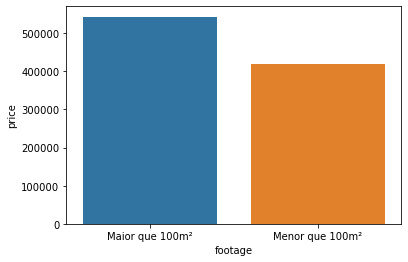

In [79]:
h10 = data[['footage', 'price']].groupby('footage').mean().reset_index()

sns.barplot(x='footage', y='price', data = h10)

h10_percentual = (h10.loc[0,'price'] / h10.loc[1,'price'] -1) * 100
print(f'Os imóveis com área maior que 100m², vendem {h10_percentual:.2f}% a mais do que imóveis com área menor que 100m².')

# Resolvendo as questões levantadas pelo CEO da House Rocket

# 1 - Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

* Abaixo você verá que foi gerado um arquivo .csv com os dados de todos os imóveis sugeridos para compra.
* Foram sugeridos para compra apenas os imóveis com valor abaixo da média do zipcode e com condição Regular ou Boa.

In [80]:
zipcode = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()

df = pd.merge(zipcode, data, on='zipcode', how='inner')

df = df.rename(columns = {'price_y' : 'price', 'price_x' : 'price_median'})

# Criação de coluna ('status') no DataFrame com sugestão de compra (ou não) do imóvel, 
# com base no preço médio por zipcode e condição do imóvel.
for i in range(len(df)):
    if (df.loc[i, 'price']< df.loc[i,'price_median']) & (df.loc[i, 'condition']>=3):
        df.loc[i, 'status'] = 'Comprar'
    else:
        df.loc[i, 'status'] = 'Não comprar'
        
comprar = df[df['status'] == 'Comprar']

comprar['status']. shape[0]

result = comprar[['id', 'price', 'price_median', 'status']]
result

result.to_csv('comprar.csv')

# 2 - Uma vez a casa comprada, qual o melhor momento para vendê-la e por qual preço?

* Se o preço de compra, for maior que a mediana da região por sazonalidade, o preço de venda deve ser igual ao preço de compra acrescido 10%
* Se o preço de compra, for menor que a mediana da regiaão por sazonalidade, o preço de venda deve ser o preço de compra acrescido 30%

In [82]:
data = comprar[comprar['status'] == 'Comprar']

df1 = data [['price', 'season', 'zipcode']]. groupby(['zipcode','season']).median().reset_index()
df1 = df1.rename(columns={'price':'price_median_season'})

df2 = pd.merge(df1,data, on='zipcode', how='inner')
df2 = df2.rename(columns={'season_x':'season'})

# Visualização do melhor valor a ser vendido cada imóvel.
for i, row in df2.iterrows():
    if (row['price'] >= row['price_median_season']):
        df2.loc[i,'sale'] = row['price']*1.10
    else:
        df2.loc[i, 'sale'] = row['price']*1.30

In [83]:
# Visualização do lucro a ser obtido por venda.
df2['profit'] = df2['sale'] - df2['price']
df2[['price','sale','profit']]

,price,sale,profit
0,230000.0,253000.0,23000.0
1,252000.0,277200.0,25200.0
2,227950.0,250745.0,22795.0
3,196000.0,254800.0,58800.0
4,243000.0,267300.0,24300.0
...,...,...,...
42015,465000.0,604500.0,139500.0
42016,542300.0,704990.0,162690.0
42017,570000.0,627000.0,57000.0
42018,453000.0,588900.0,135900.0


In [84]:
# Visualização da melhor estação para vender o imóvel.
df3 = df3[['id', 'price', 'zipcode', 'price_median', 'season', 'price_median_season', 
           'condition_type', 'status', 'sale', 'profit']].sort_values(['id','profit'])

df3 = df3.drop_duplicates(subset=['id'], keep='first')

melhor_est = df3[['id','season','sale']]
melhor_est

,id,season,sale
39117,2800031,Autumn,258500.0
36426,3600057,Autumn,442750.0
40097,3800008,Autumn,231400.0
17701,7200179,Autumn,227500.0
31720,7400062,Autumn,329780.0
...,...,...,...
34392,9842300095,Autumn,401500.0
34285,9842300485,Autumn,418000.0
34318,9842300540,Autumn,372900.0
7310,9895000040,Autumn,519870.0


# Lucro Total a ser gerado através deste projeto de análise.

* Custo total:

In [85]:
custo = df3['price'].sum()
custo
print(f'O custo total da aquisição dos imóveis sugeridos por este projeto de análise é de {custo :,.2f}')

O custo total da aquisição dos imóveis sugeridos por este projeto de análise é de 4,079,586,744.00


* Receita total:

In [86]:
receita = df3['sale'].sum()
receita
print(f'A receita total gerada com a venda de todos os imóveis sugeridos por este projeto de análise é {receita :,.2f}')

A receita total gerada com a venda de todos os imóveis sugeridos por este projeto de análise é 4,766,745,551.20


* Lucro total:

In [87]:
lucro = df3['profit'].sum()
lucro
print(f'O lucro total obtido com a venda de todos os imóveis sugeridos por este projeto de análise é {lucro :,.2f}')

O lucro total obtido com a venda de todos os imóveis sugeridos por este projeto de análise é 687,158,807.20
